<h1>Rishabh Anand</h1>


<h2>Crime Prediction</h2>

Problem statement:
<ul>
    <li>Identifying the most common types of crimes in a particular area in order to take steps to prevent them.</li>
    <li>Predicting the age, gender and ethnicity of a victim based on the type of crime and location.</li>
</ul>

Data source: https://catalog.data.gov/dataset/crime-data-from-2020-to-present

Importing all the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error
import folium
import random
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier

<h3>Importing Data</h3>

In [2]:
df_orig = pd.read_csv("Crime_Data.csv") # Reading the CSV data from the source

In [3]:
df_orig

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686431,230806871,03/03/2023 12:00:00 AM,03/02/2023 12:00:00 AM,620,8,West LA,889,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,2000 S HOLT AV,NaN,34.0412,-118.3814
686432,231104474,01/12/2023 12:00:00 AM,01/12/2023 12:00:00 AM,1240,11,Northeast,1107,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,1000 MILWAUKEE AV,NaN,34.1214,-118.1915
686433,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
686434,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054


In [4]:
df = df_orig.copy()

In [5]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686431,230806871,03/03/2023 12:00:00 AM,03/02/2023 12:00:00 AM,620,8,West LA,889,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,2000 S HOLT AV,NaN,34.0412,-118.3814
686432,231104474,01/12/2023 12:00:00 AM,01/12/2023 12:00:00 AM,1240,11,Northeast,1107,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,IC,Invest Cont,440.0,NaN,NaN,NaN,1000 MILWAUKEE AV,NaN,34.1214,-118.1915
686433,230804266,01/08/2023 12:00:00 AM,01/08/2023 12:00:00 AM,1030,8,West LA,839,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,NaN,NaN,NaN,10200 SANTA MONICA BL,NaN,34.0611,-118.4184
686434,231604807,01/27/2023 12:00:00 AM,01/26/2023 12:00:00 AM,1800,16,Foothill,1663,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,12500 BRANFORD ST,NaN,34.2466,-118.4054


In [6]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,6.864360e+05,686436.000000,686436.000000,686436.000000,686436.000000,686436.000000,686436.000000,686428.000000,238594.000000,686427.000000,51277.000000,1725.000000,52.000000,686436.000000,686436.000000
mean,2.132074e+08,1333.499811,10.716010,1117.978852,1.416087,500.558104,29.981714,304.760770,362.183969,500.296361,956.600347,983.320580,990.615385,33.961087,-117.963252
std,9.372347e+06,654.501645,6.089271,608.920750,0.492909,207.835198,21.680421,216.293713,123.832632,207.623663,113.081887,52.466693,29.227407,1.957629,6.789628
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.019134e+08,900.000000,6.000000,622.000000,1.000000,330.000000,12.000000,101.000000,308.000000,330.000000,998.000000,998.000000,998.000000,34.013200,-118.429500
50%,2.115139e+08,1411.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058300,-118.321400
75%,2.211045e+08,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163100,-118.273900
max,2.399097e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,971.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


<h3>Data preprocessing</h3>

Dealing with null values

In [7]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            94375
Vict Age               0
Vict Sex           89921
Vict Descent       89926
Premis Cd              8
Premis Desc          361
Weapon Used Cd    447842
Weapon Desc       447842
Status                 0
Status Desc            0
Crm Cd 1               9
Crm Cd 2          635159
Crm Cd 3          684711
Crm Cd 4          686384
LOCATION               0
Cross Street      574741
LAT                    0
LON                    0
dtype: int64

In [8]:
df['Vict Sex'] = df['Vict Sex'].fillna('X') # Replacing null values with X i.e unknown
df['Vict Descent'] = df['Vict Descent'].fillna('X') # Replacing null values with X i.e unknown

In [9]:
# Dropping rows from Vict Sex having value as H
df = df[df['Vict Sex'] != 'H']

# Dropping rows from Premis Cd having null values
df = df.dropna(subset=['Premis Cd'])

# Dropping rows from Crm Cd 1 having null values
df = df.dropna(subset=['Crm Cd 1'])

In [10]:
# Removing unwanted columns
df = df.drop(['Mocodes', 'Premis Desc', 'Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 
              'Cross Street', 'Status Desc', 'LOCATION', 'AREA NAME', 'Crm Cd Desc'], axis=1)

In [11]:
# Null values removed from all the required columns
df.isnull().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Status          0
Crm Cd 1        0
LAT             0
LON             0
dtype: int64

In [12]:
df.dtypes

DR_NO             int64
Date Rptd        object
DATE OCC         object
TIME OCC          int64
AREA              int64
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Vict Age          int64
Vict Sex         object
Vict Descent     object
Premis Cd       float64
Status           object
Crm Cd 1        float64
LAT             float64
LON             float64
dtype: object

In [13]:
# Converting values of 'Date Rptd' and 'DATE OCC' columns into three different columns of day, month and year

In [14]:
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'])
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'])

In [15]:
# Extracting day, month, and year into separate columns
df['Day Rptd'] = df['Date Rptd'].dt.day
df['Month Rptd'] = df['Date Rptd'].dt.month
df['Year Rptd'] = df['Date Rptd'].dt.year

df['Day OCC'] = df['DATE OCC'].dt.day
df['Month OCC'] = df['DATE OCC'].dt.month
df['Year OCC'] = df['DATE OCC'].dt.year

In [16]:
# Dropping the original "Date Rptd" and "DATE OCC" columns
df = df.drop(['Date Rptd', 'DATE OCC'], axis=1)

In [17]:
# Extracting hours and minutes from "Time OCC" column
df['Hour'] = df['TIME OCC'] // 100
df['Minute'] = df['TIME OCC'] % 100

# Dropping the original "Time OCC" column
df = df.drop('TIME OCC', axis=1)

In [18]:
# Checking again for null values
df.isnull().sum()

DR_NO           0
AREA            0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Status          0
Crm Cd 1        0
LAT             0
LON             0
Day Rptd        0
Month Rptd      0
Year Rptd       0
Day OCC         0
Month OCC       0
Year OCC        0
Hour            0
Minute          0
dtype: int64

In [19]:
df.dtypes

DR_NO             int64
AREA              int64
Rpt Dist No       int64
Part 1-2          int64
Crm Cd            int64
Vict Age          int64
Vict Sex         object
Vict Descent     object
Premis Cd       float64
Status           object
Crm Cd 1        float64
LAT             float64
LON             float64
Day Rptd          int64
Month Rptd        int64
Year Rptd         int64
Day OCC           int64
Month OCC         int64
Year OCC          int64
Hour              int64
Minute            int64
dtype: object

Dealing with outliers

In [20]:
# Vict Age column range
print(df['Vict Age'].min(),"to", df['Vict Age'].max())

-2 to 120


In [21]:
# Detecting and handling outliers (using z-score method) in 'Vict Age' column
z_scores = (df['Vict Age'] - df['Vict Age'].mean()) / df['Vict Age'].std()
df = df[(z_scores < 3)] 

In [22]:
df = df[df['Vict Age'] >= 0]  # Removing rows with negative age values

In [23]:
# Age range after removing outliers
print(df['Vict Age'].min(),"to", df['Vict Age'].max())

0 to 95


Turning categorical data into numerical data via LabelEncoder

In [24]:
label_encoder = LabelEncoder()

# Converting the 'Vict Sex','Vict Descent' and 'Status' column using LabelEncoder
df['Vict Sex'] = label_encoder.fit_transform(df['Vict Sex'])
df['Vict Descent'] = label_encoder.fit_transform(df['Vict Descent'])
df['Status'] = label_encoder.fit_transform(df['Status'])

In [25]:
df = df.dropna()

In [26]:
# Converting all columns to integer type except 'LAT' and 'LON' columns
df = df.astype({col: 'int64' for col in df.columns if col not in ['LAT', 'LON']})

In [27]:
# Processed dataset
df

,DR_NO,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Vict Sex,Vict Descent,Premis Cd,Status,...,LAT,LON,Day Rptd,Month Rptd,Year Rptd,Day OCC,Month OCC,Year OCC,Hour,Minute
0,10304468,3,377,2,624,36,0,1,501,1,...,34.0141,-118.2978,8,1,2020,8,1,2020,22,30
1,190101086,1,163,2,624,25,1,6,102,3,...,34.0459,-118.2545,2,1,2020,1,1,2020,3,30
2,200110444,1,155,2,845,0,2,17,726,0,...,34.0448,-118.2474,14,4,2020,13,2,2020,12,0
3,191501505,15,1543,2,745,76,0,16,502,3,...,34.1685,-118.4019,1,1,2020,1,1,2020,17,30
4,191921269,19,1998,2,740,31,2,17,409,3,...,34.2198,-118.4468,1,1,2020,1,1,2020,4,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686431,230806871,8,889,2,354,25,1,16,502,3,...,34.0412,-118.3814,3,3,2023,2,3,2023,6,20
686432,231104474,11,1107,1,440,42,1,16,101,3,...,34.1214,-118.1915,12,1,2023,12,1,2023,12,40
686433,230804266,8,839,1,341,48,1,11,717,3,...,34.0611,-118.4184,8,1,2023,8,1,2023,10,30
686434,231604807,16,1663,2,740,23,1,6,122,3,...,34.2466,-118.4054,27,1,2023,26,1,2023,18,0


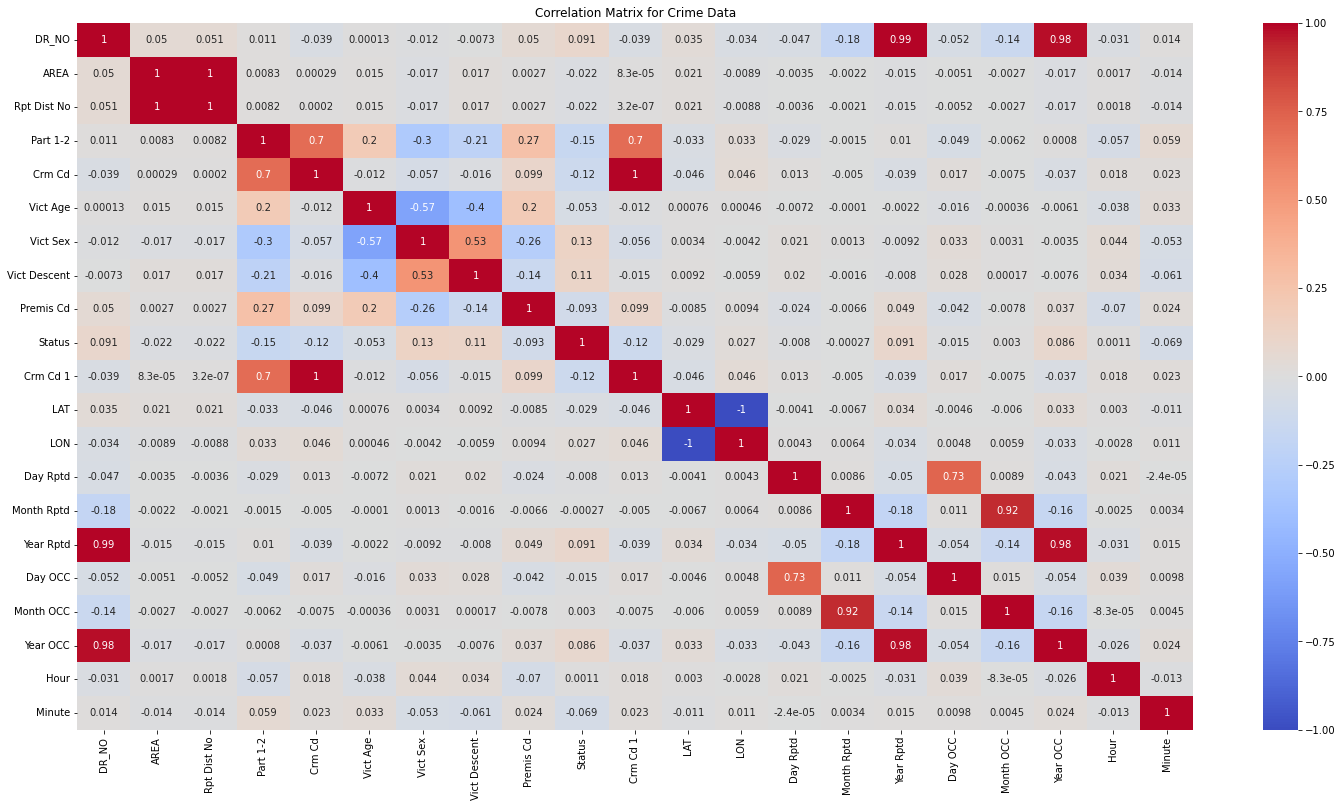

In [28]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(25,13))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix for Crime Data')
plt.show()

<h3>Crime classification</h3>

Algorithms used:
<ul>
    <li>Random Forest Classifier</li>
    <li>Logistic Regression</li>
    <li>K Neighbors Classifier</li>
</ul>

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

df_subset = df.head(200000)

# Splitting the data into features (X) and target (y)
X = df_subset.drop(['Crm Cd'], axis=1)
y = df_subset['Crm Cd'] # Crime Code i.e it defines the type of crime


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [30]:
# Random Forest Classifier
rf_pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
rf_pipeline.fit(X_train, y_train)
rf_y_pred = rf_pipeline.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9565


In [31]:
# Calculating the classification report
report_rf = classification_report(y_test, rf_y_pred)
print(report_rf)

              precision    recall  f1-score   support

         110       0.98      0.74      0.85        70
         113       0.00      0.00      0.00         1
         121       0.92      0.94      0.93       171
         122       1.00      0.06      0.11        17
         210       0.96      1.00      0.98      1345
         220       0.99      0.89      0.94       210
         230       0.99      1.00      0.99      2303
         231       0.96      0.90      0.93        81
         235       1.00      0.79      0.89        34
         236       0.97      0.98      0.98       581
         237       0.98      1.00      0.99        54
         250       0.90      0.50      0.64        18
         251       0.98      0.82      0.89        96
         310       0.99      1.00      1.00      2660
         320       1.00      0.93      0.96       201
         330       1.00      1.00      1.00      2575
         331       1.00      0.98      0.99       942
         341       0.94    

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


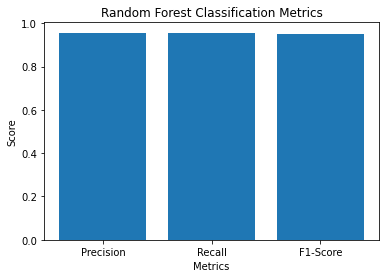

In [32]:
# Calculating precision, recall, and F1-score from predictions and true labels
precision = precision_score(y_test, rf_y_pred, average='weighted')
recall = recall_score(y_test, rf_y_pred, average='weighted')
f1 = f1_score(y_test, rf_y_pred, average='weighted')

# Creating a bar plot
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]

plt.bar(metrics, values)
plt.title('Random Forest Classification Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

In [33]:
# Logistic Regression
lr_pipeline = make_pipeline(StandardScaler(), LogisticRegression())
lr_pipeline.fit(X_train, y_train)
lr_y_pred = lr_pipeline.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")

Logistic Regression Accuracy: 0.6755


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
# Calculating the classification report
report_lr = classification_report(y_test, lr_y_pred)
print(report_lr)

              precision    recall  f1-score   support

         110       0.00      0.00      0.00        70
         113       0.00      0.00      0.00         1
         121       0.91      0.87      0.89       171
         122       0.00      0.00      0.00        17
         210       0.77      0.60      0.67      1345
         220       0.00      0.00      0.00       210
         230       0.65      0.90      0.75      2303
         231       0.74      0.31      0.43        81
         235       0.00      0.00      0.00        34
         236       0.52      0.42      0.46       581
         237       0.87      0.74      0.80        54
         250       0.00      0.00      0.00        18
         251       0.00      0.00      0.00        96
         310       0.65      0.85      0.74      2660
         320       0.00      0.00      0.00       201
         330       0.54      0.83      0.65      2575
         331       0.50      0.01      0.02       942
         341       0.70    

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


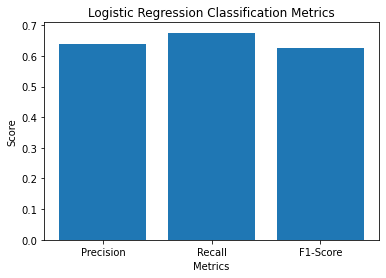

In [35]:
# Calculating precision, recall, and F1-score from predictions and true labels
precision = precision_score(y_test, lr_y_pred, average='weighted')
recall = recall_score(y_test, lr_y_pred, average='weighted')
f1 = f1_score(y_test, lr_y_pred, average='weighted')

# Creating a bar plot
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]

plt.bar(metrics, values)
plt.title('Logistic Regression Classification Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

In [36]:
# K Neighbors Classifier
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
knn_pipeline.fit(X_train, y_train)
knn_y_pred = knn_pipeline.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.4796


In [37]:
# Calculating the classification report
report_knn = classification_report(y_test, knn_y_pred)
print(report_knn)

              precision    recall  f1-score   support

         110       0.18      0.04      0.07        70
         113       0.00      0.00      0.00         1
         121       0.41      0.26      0.32       171
         122       0.00      0.00      0.00        17
         210       0.30      0.32      0.31      1345
         220       0.04      0.02      0.03       210
         230       0.42      0.55      0.48      2303
         231       0.53      0.43      0.48        81
         235       0.00      0.00      0.00        34
         236       0.31      0.34      0.32       581
         237       0.84      0.57      0.68        54
         250       0.00      0.00      0.00        18
         251       0.20      0.14      0.16        96
         310       0.43      0.58      0.50      2660
         320       0.05      0.01      0.02       201
         330       0.38      0.57      0.46      2575
         331       0.18      0.11      0.14       942
         341       0.19    

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classificat

C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


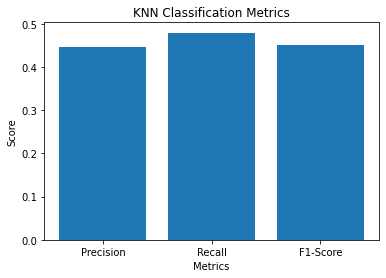

In [38]:
# Calculating precision, recall, and F1-score from predictions and true labels
precision = precision_score(y_test, knn_y_pred, average='weighted')
recall = recall_score(y_test, knn_y_pred, average='weighted')
f1 = f1_score(y_test, knn_y_pred, average='weighted')

# Creating a bar plot
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1]

plt.bar(metrics, values)
plt.title('KNN Classification Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

<h3> Age, gender and ethnicity Prediction</h3>

Algorithms used:
<ul>
    <li>Ridge Regression</li>
    <li>Random Forest Regression</li>
    <li>Gradient Boosting Regression</li>
    <li>Extreme Gradient Boosting Regression</li>
</ul>

<h4>Age Prediction</h4>

In [39]:
# Splitting the data into features (X) and target (y)
X = df.drop(['Vict Age'], axis=1)
y = df['Vict Age']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:400000], y[:400000], test_size=0.8, random_state=29)

# Creating pipelines with necessary preprocessing steps and the regressor models
pipelines = [
    ('Ridge', Pipeline([('scaler', StandardScaler()),
                        ('regressor', Ridge())])),
    ('Random Forest', Pipeline([('scaler', StandardScaler()),
                                ('regressor', RandomForestRegressor())])),
    ('Gradient Boosting', Pipeline([('scaler', StandardScaler()),
                                    ('regressor', GradientBoostingRegressor())])),
    ('XGBoost', Pipeline([('scaler', StandardScaler()),
                          ('regressor', XGBRegressor())]))
]

# Performing cross-validation on the pipelines and calculating the mean squared error
results = {}
for name, pipeline in pipelines:
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'scores': scores, 'mse': mse}

# Printing the cross-validation mean R^2 scores and mean squared error for each model
for name, result in results.items():
    scores = result['scores']
    mse = result['mse']
    cv_mean = scores.mean()
    print(f"{name}:")
    print(f"Cross-Validation R^2: {cv_mean:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print()

Ridge:
Cross-Validation R^2: 0.35
Mean Squared Error: 303.93

Random Forest:
Cross-Validation R^2: 0.58
Mean Squared Error: 196.44

Gradient Boosting:
Cross-Validation R^2: 0.55
Mean Squared Error: 210.20

XGBoost:
Cross-Validation R^2: 0.59
Mean Squared Error: 192.15



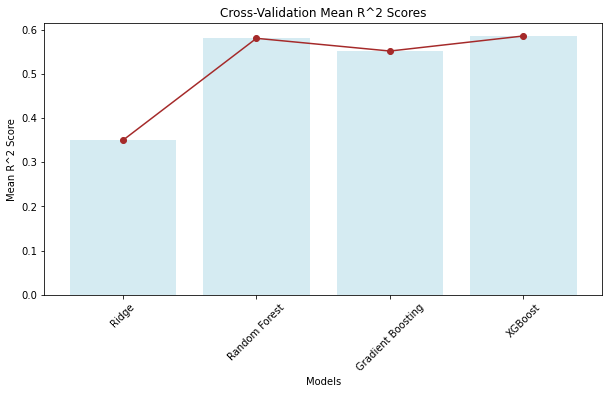

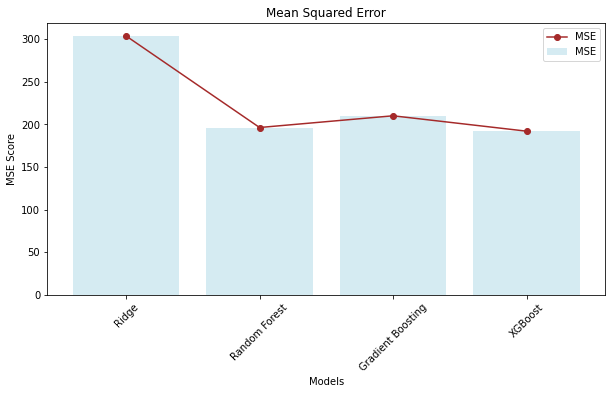

In [40]:
# Extracting the model names and R^2 scores
model_names = list(results.keys())
r2_scores = [result['scores'].mean() for result in results.values()]
mse_scores = [result['mse'] for result in results.values()]

# Creating x-axis values for the line graph
x = np.arange(len(model_names))

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(x, r2_scores, marker='o', linestyle='-', color='brown')
plt.title('Cross-Validation Mean R^2 Scores')
plt.xlabel('Models')
plt.ylabel('Mean R^2 Score')
plt.xticks(x, model_names, rotation=45)

ax = plt.gca()
ax.bar(x, r2_scores, alpha=0.5, align='center', color='lightblue')

plt.show()

plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_scores, color='lightblue', alpha=0.5, label='MSE')
plt.plot(model_names, mse_scores, marker='o', linestyle='-', color='brown', label='MSE')

plt.title('Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<h4>Gender Prediction</h4>

In [41]:
# Splitting the data into features (X) and target (y)
X = df.drop(['Vict Sex'], axis=1)
y = df['Vict Sex']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:200000], y[:200000], test_size=0.8, random_state=29)

# Creating pipelines with necessary preprocessing steps and the regressor models
pipelines = [
    ('Ridge', Pipeline([('scaler', StandardScaler()),
                        ('regressor', Ridge())])),
    ('Random Forest', Pipeline([('scaler', StandardScaler()),
                                ('regressor', RandomForestRegressor())])),
    ('Gradient Boosting', Pipeline([('scaler', StandardScaler()),
                                    ('regressor', GradientBoostingRegressor())])),
    ('XGBoost', Pipeline([('scaler', StandardScaler()),
                          ('regressor', XGBRegressor())]))
]

# Performing cross-validation on the pipelines and calculating the mean squared error
results = {}
for name, pipeline in pipelines:
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'scores': scores, 'mse': mse}

# Printing the cross-validation mean R^2 scores and mean squared error for each model
for name, result in results.items():
    scores = result['scores']
    mse = result['mse']
    cv_mean = scores.mean()
    print(f"{name}:")
    print(f"Cross-Validation R^2: {cv_mean:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print()

Ridge:
Cross-Validation R^2: 0.46
Mean Squared Error: 0.30

Random Forest:
Cross-Validation R^2: 0.67
Mean Squared Error: 0.18

Gradient Boosting:
Cross-Validation R^2: 0.68
Mean Squared Error: 0.18

XGBoost:
Cross-Validation R^2: 0.67
Mean Squared Error: 0.18



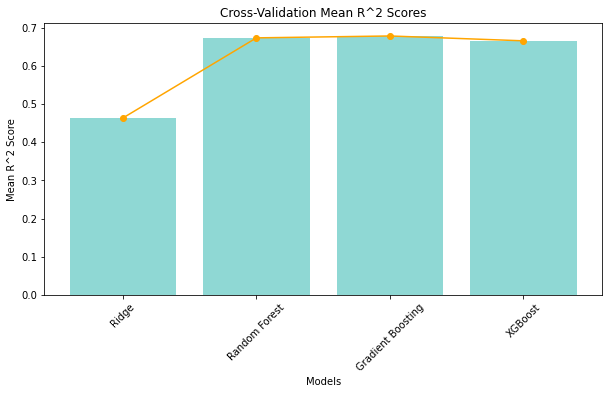

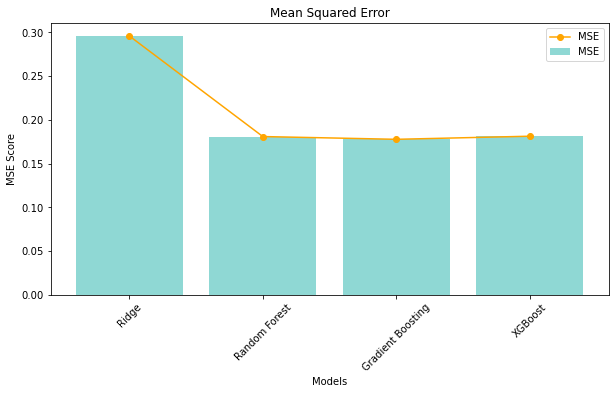

In [42]:
# Extracting the model names and R^2 scores
model_names = list(results.keys())
r2_scores = [result['scores'].mean() for result in results.values()]
mse_scores = [result['mse'] for result in results.values()]

# Creating x-axis values for the line graph
x = np.arange(len(model_names))

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(x, r2_scores, marker='o', linestyle='-', color='orange')
plt.title('Cross-Validation Mean R^2 Scores')
plt.xlabel('Models')
plt.ylabel('Mean R^2 Score')
plt.xticks(x, model_names, rotation=45)

ax = plt.gca()
ax.bar(x, r2_scores, alpha=0.5, align='center', color='lightseagreen')

plt.show()

plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_scores, color='lightseagreen', alpha=0.5, label='MSE')
plt.plot(model_names, mse_scores, marker='o', linestyle='-', color='orange', label='MSE')

plt.title('Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<h4>Ethnicity Prediction</h4>

In [43]:
# Splitting the data into features (X) and target (y)
X = df.drop(['Vict Descent'], axis=1)
y = df['Vict Descent']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:200000], y[:200000], test_size=0.8, random_state=29)

# Creating pipelines with necessary preprocessing steps and the regressor models
pipelines = [
    ('Ridge', Pipeline([('scaler', StandardScaler()),
                        ('regressor', Ridge())])),
    ('Random Forest', Pipeline([('scaler', StandardScaler()),
                                ('regressor', RandomForestRegressor())])),
    ('Gradient Boosting', Pipeline([('scaler', StandardScaler()),
                                    ('regressor', GradientBoostingRegressor())])),
    ('XGBoost', Pipeline([('scaler', StandardScaler()),
                          ('regressor', XGBRegressor())]))
]

# Performing cross-validation on the pipelines and calculating the mean squared error
results = {}
for name, pipeline in pipelines:
    scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='r2')
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'scores': scores, 'mse': mse}

# Printing the cross-validation mean R^2 scores and mean squared error for each model
for name, result in results.items():
    scores = result['scores']
    mse = result['mse']
    cv_mean = scores.mean()
    print(f"{name}:")
    print(f"Cross-Validation R^2: {cv_mean:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print()

Ridge:
Cross-Validation R^2: 0.30
Mean Squared Error: 26.34

Random Forest:
Cross-Validation R^2: 0.50
Mean Squared Error: 18.55

Gradient Boosting:
Cross-Validation R^2: 0.50
Mean Squared Error: 18.62

XGBoost:
Cross-Validation R^2: 0.49
Mean Squared Error: 18.76



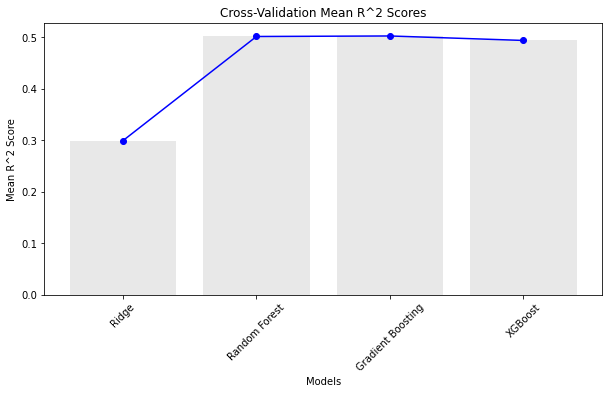

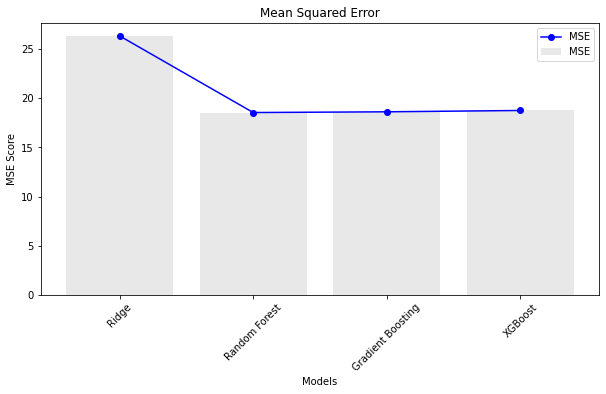

In [44]:
# Extracting the model names and R^2 scores
model_names = list(results.keys())
r2_scores = [result['scores'].mean() for result in results.values()]
mse_scores = [result['mse'] for result in results.values()]

# Creating x-axis values for the line graph
x = np.arange(len(model_names))

# Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(x, r2_scores, marker='o', linestyle='-', color='blue')
plt.title('Cross-Validation Mean R^2 Scores')
plt.xlabel('Models')
plt.ylabel('Mean R^2 Score')
plt.xticks(x, model_names, rotation=45)

ax = plt.gca()
ax.bar(x, r2_scores, alpha=0.5, align='center', color='lightgray')

plt.show()

plt.figure(figsize=(10, 5))
plt.bar(model_names, mse_scores, color='lightgray', alpha=0.5, label='MSE')
plt.plot(model_names, mse_scores, marker='o', linestyle='-', color='blue', label='MSE')

plt.title('Mean Squared Error')
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()

<h3>Data Visualization</h3>

Displaying Top 10 types of crime at various locations of Los Angeles

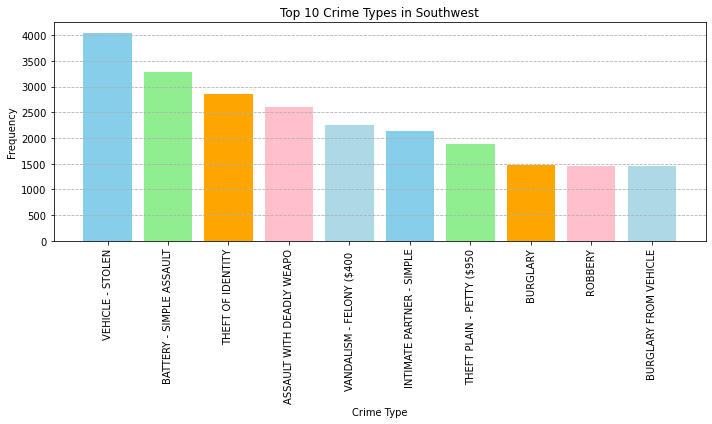

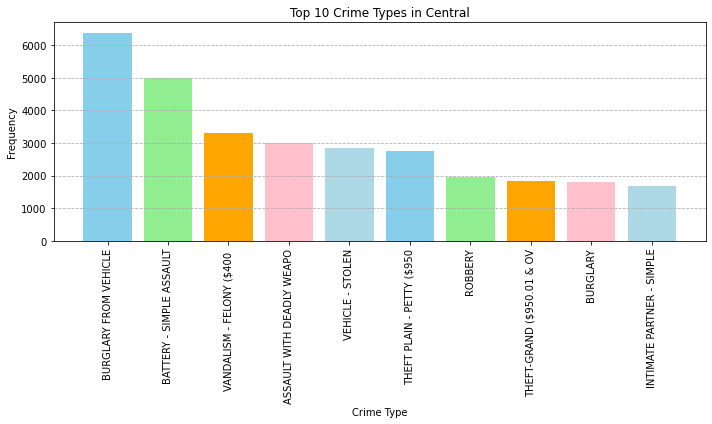

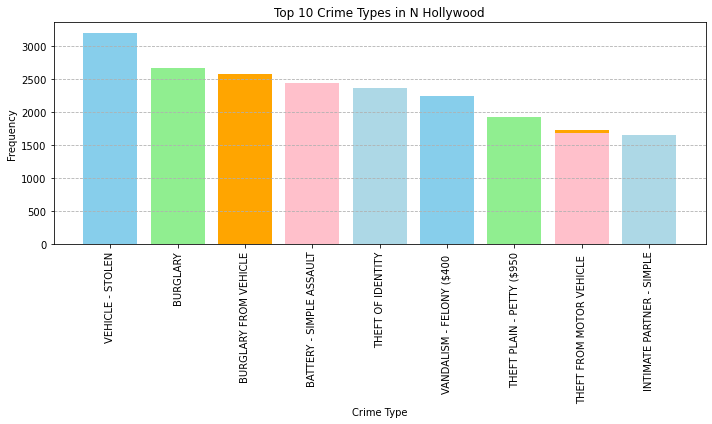

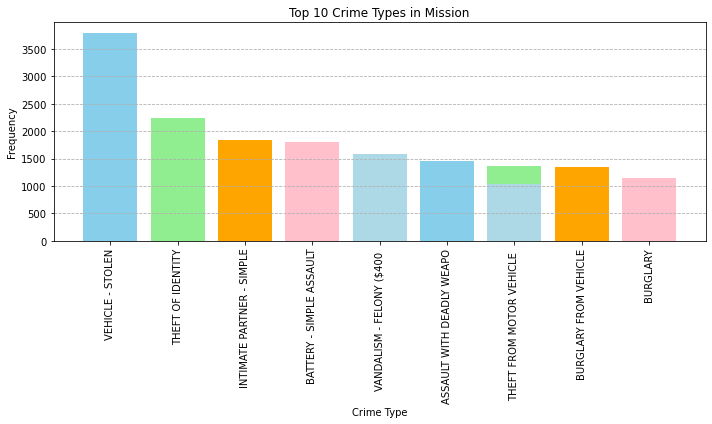

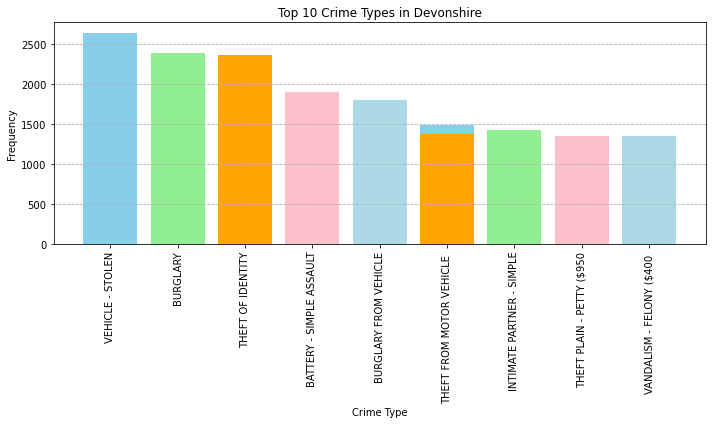

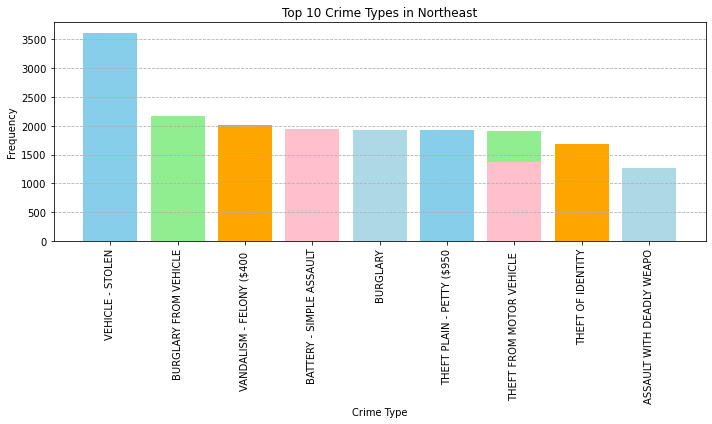

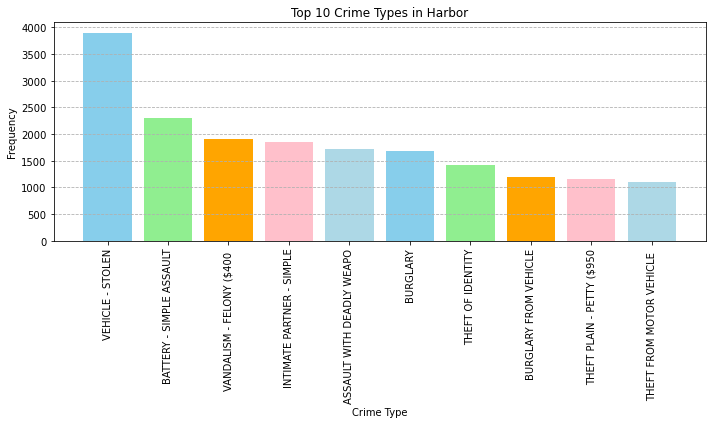

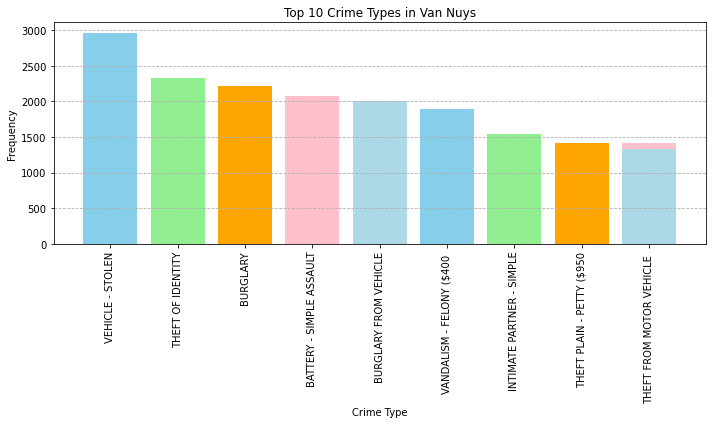

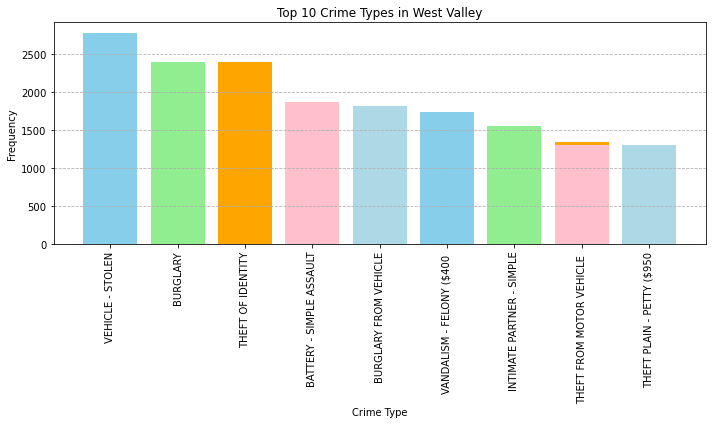

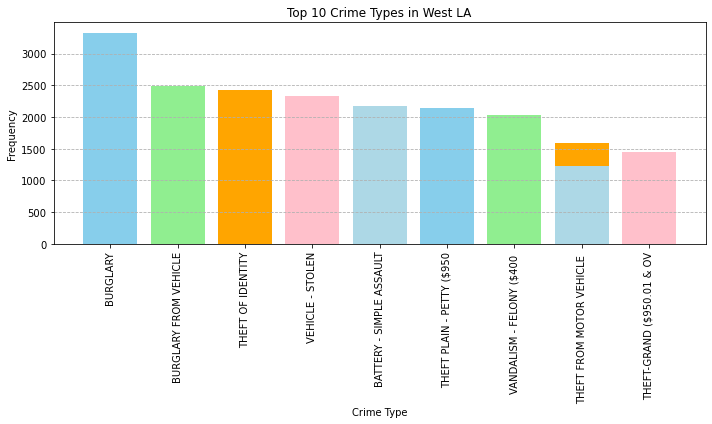

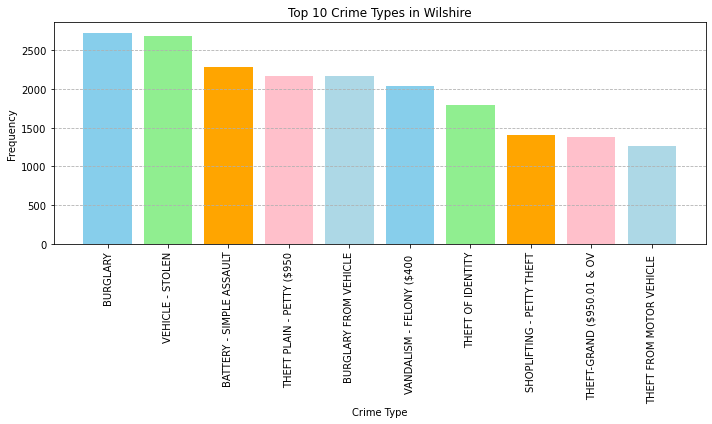

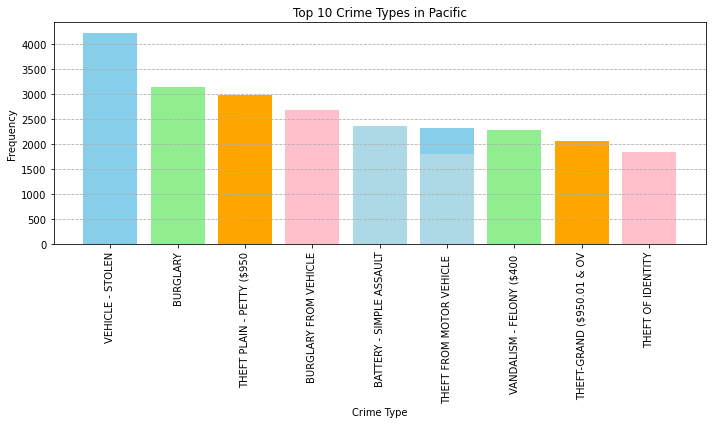

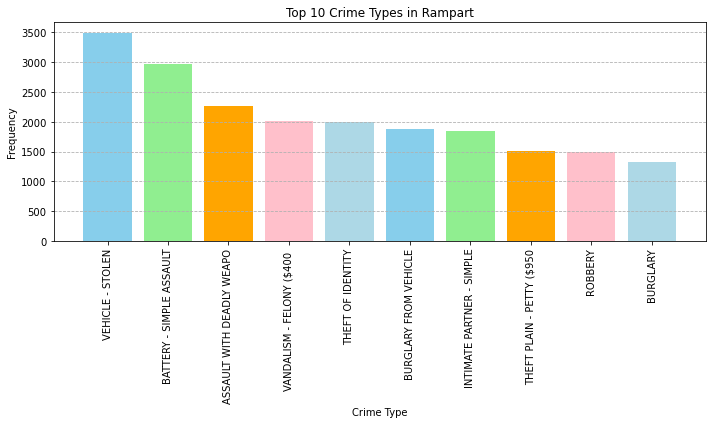

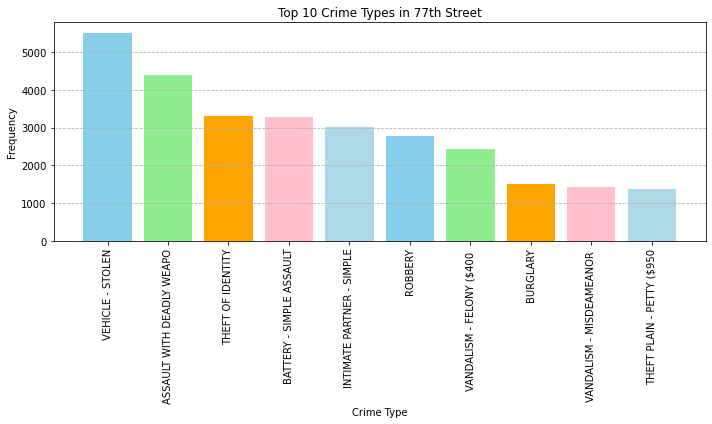

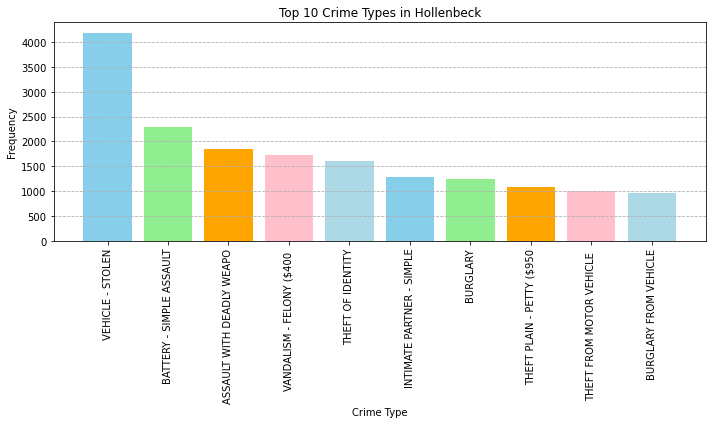

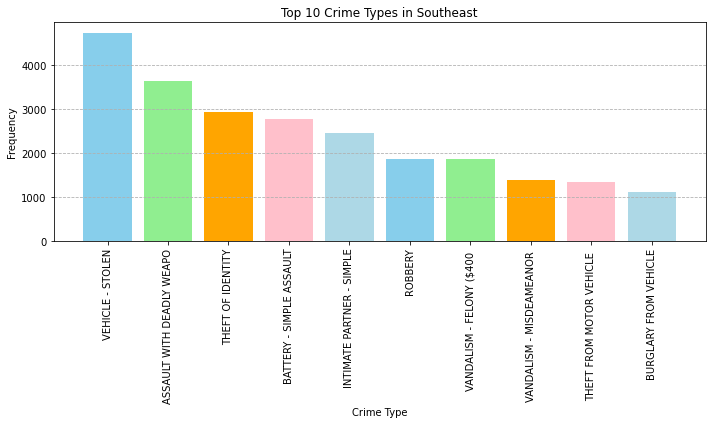

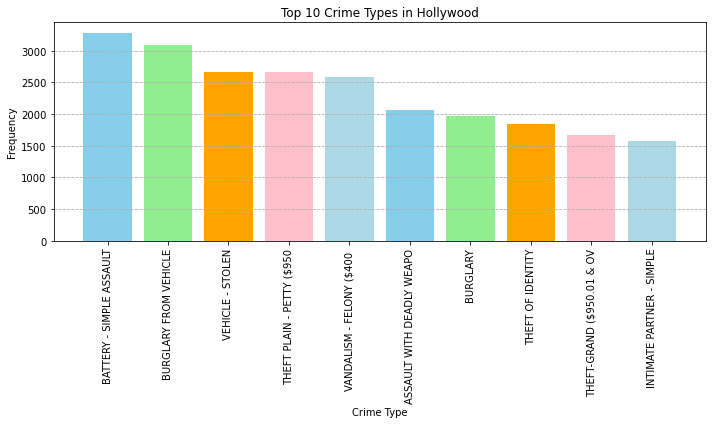

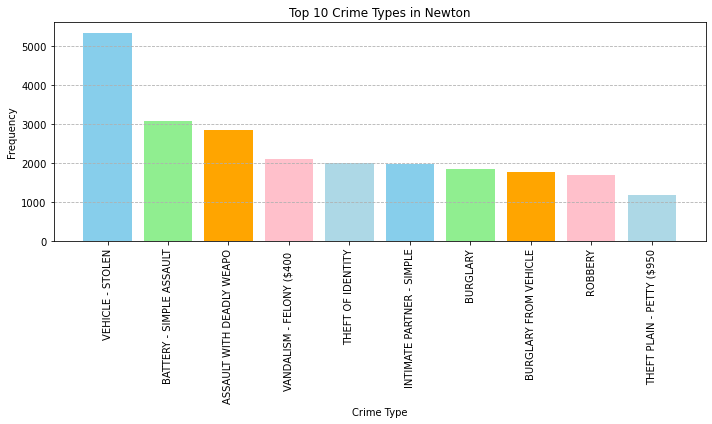

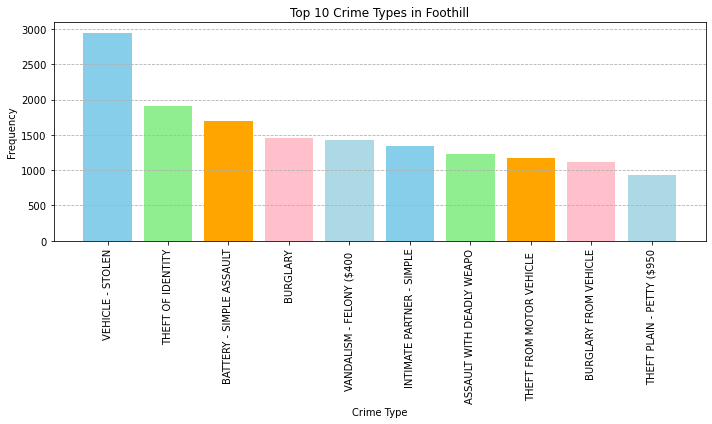

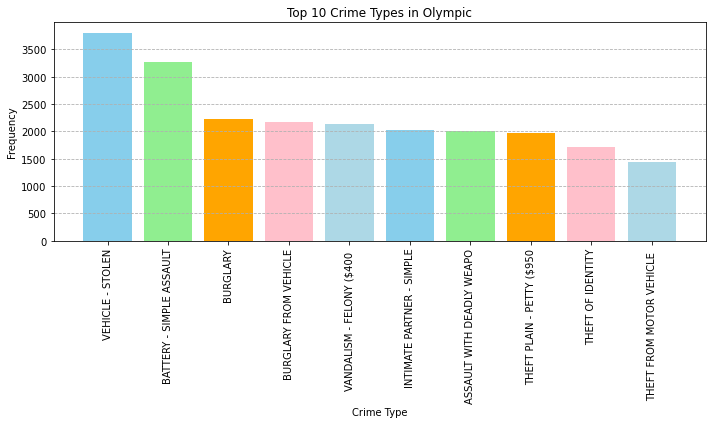

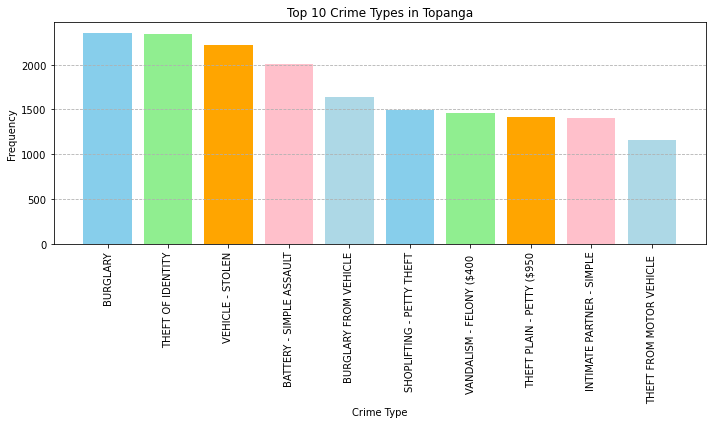

In [45]:
# Getting names of all locations in LA
area_names = df_orig['AREA NAME'].unique().tolist()

for area in area_names:
    # Filtering the dataset based on the desired area name
    filtered_df = df_orig[df_orig['AREA NAME'] == area]

    # Counting the occurrences of each crime type in the filtered dataset
    crime_counts = filtered_df['Crm Cd Desc'].value_counts()

    # Top 10 most frequent crime types
    top_crimes = crime_counts.head(10)

    top_crimes.index = top_crimes.index.str[:25]

    # Plotting a bar graph of the top 10 crime types in the specified area
    plt.figure(figsize=(10, 6))
    colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'lightblue'] 
    plt.bar(top_crimes.index, top_crimes.values, color=colors)
    plt.title(f'Top 10 Crime Types in {area}')
    plt.xlabel('Crime Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  
    plt.grid(axis='y', linestyle='--') 
    plt.tight_layout()
    plt.show()

Displaying ethnicities of victims at various locations of Los Angeles

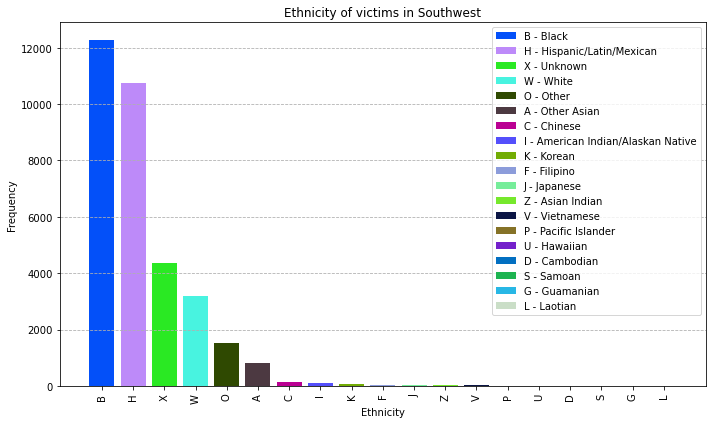

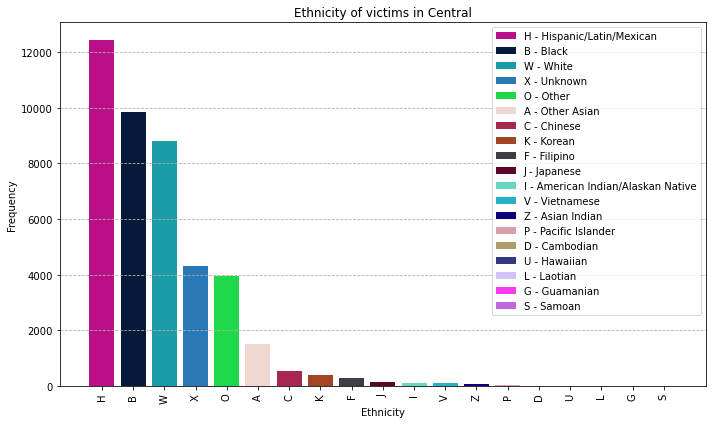

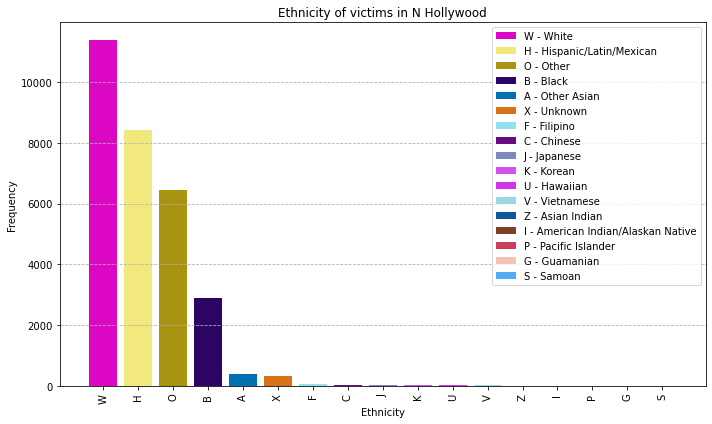

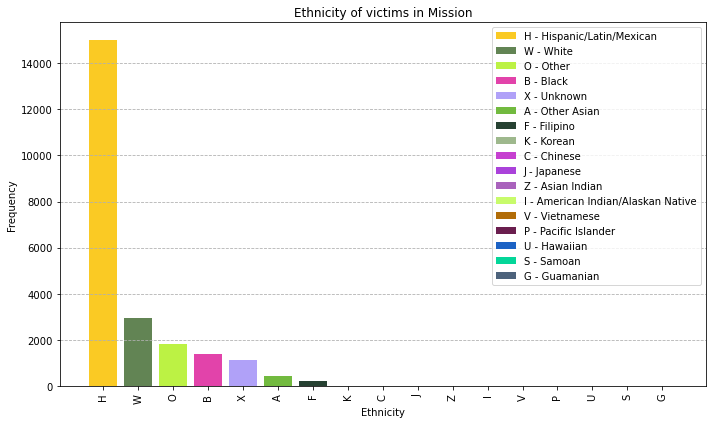

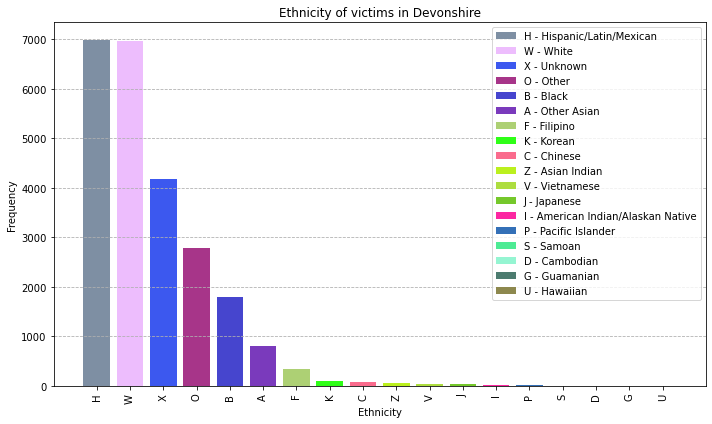

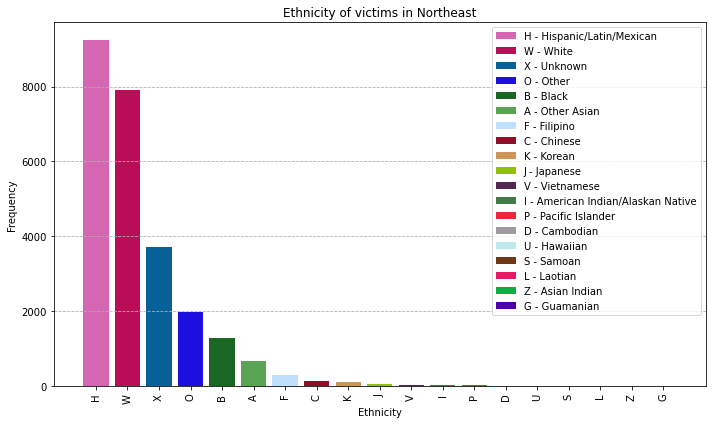

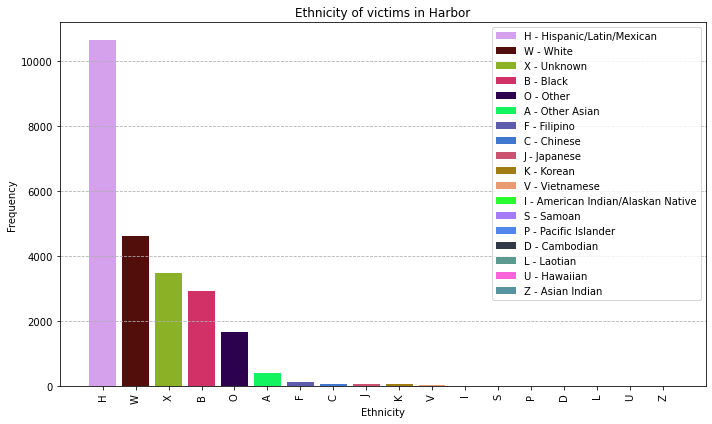

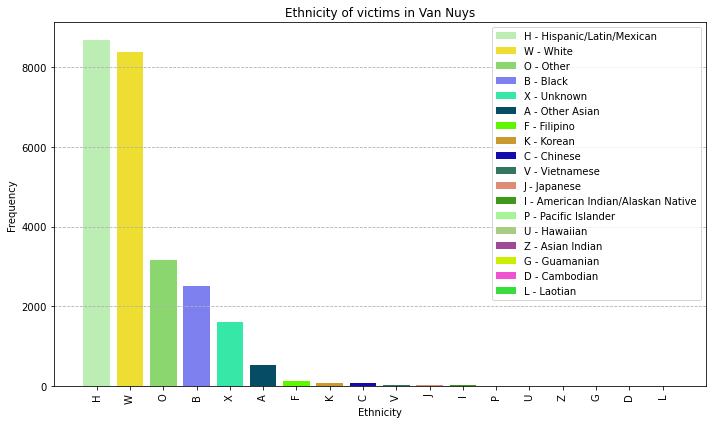

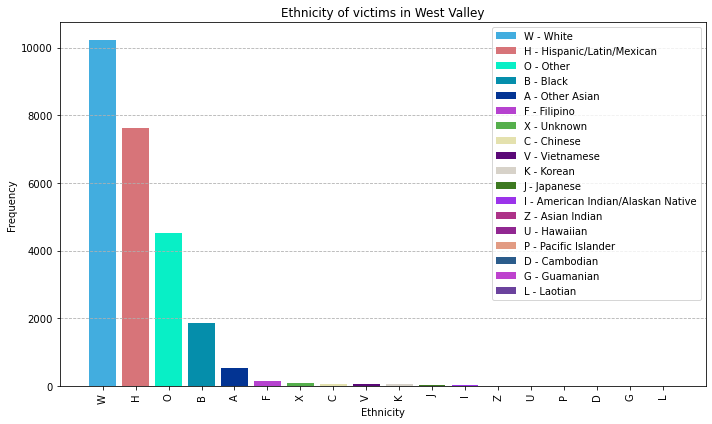

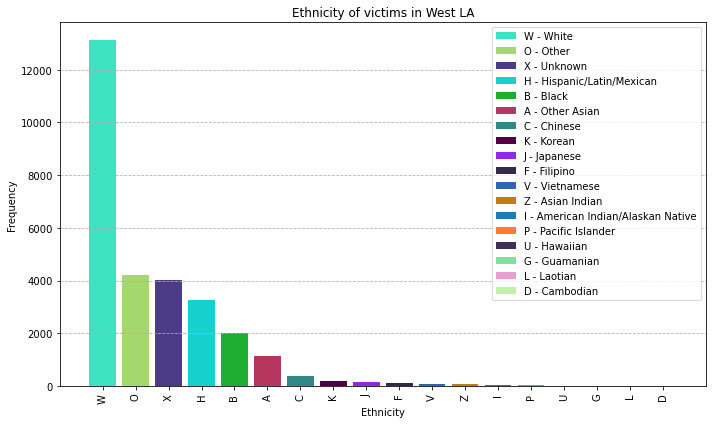

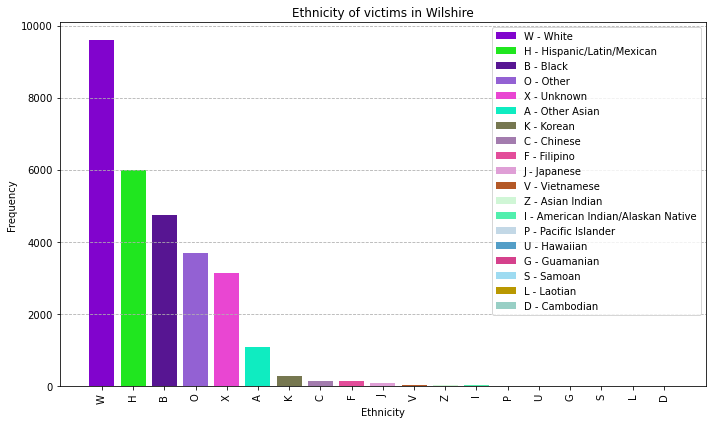

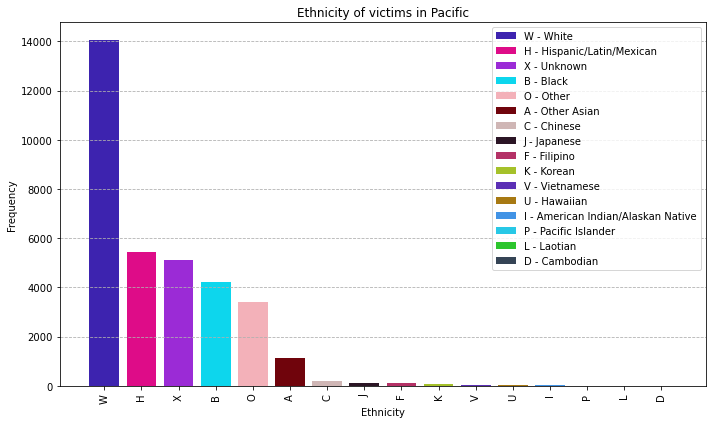

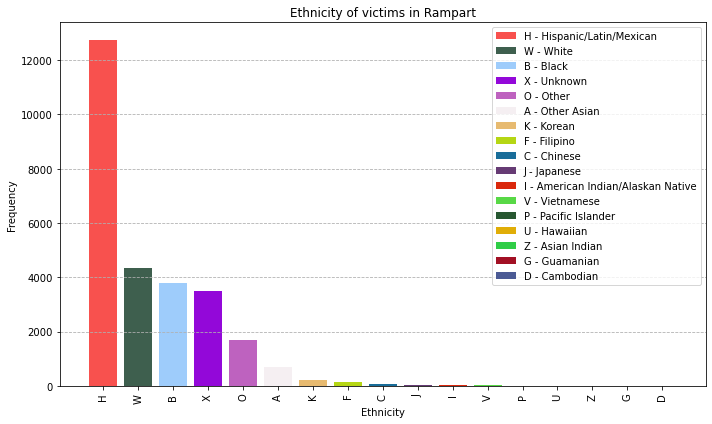

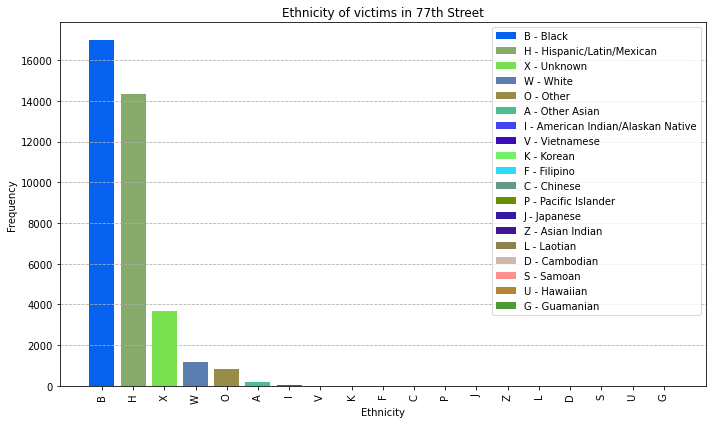

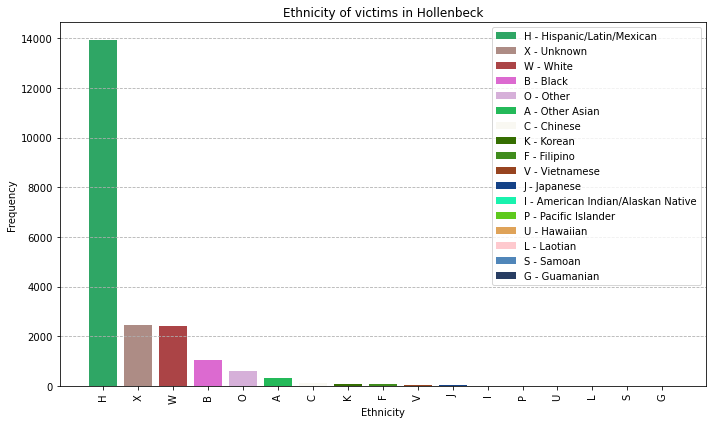

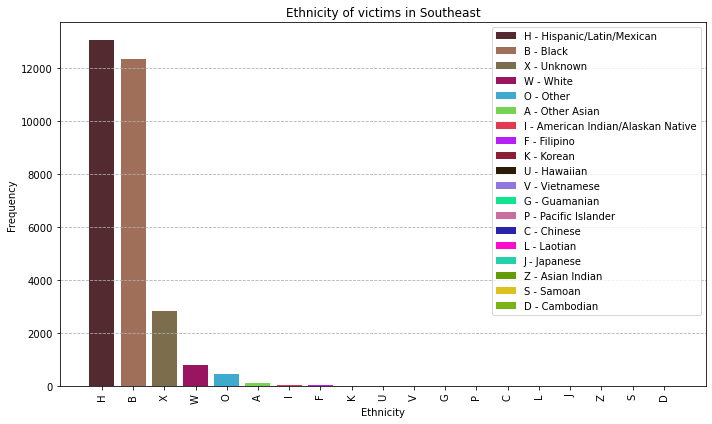

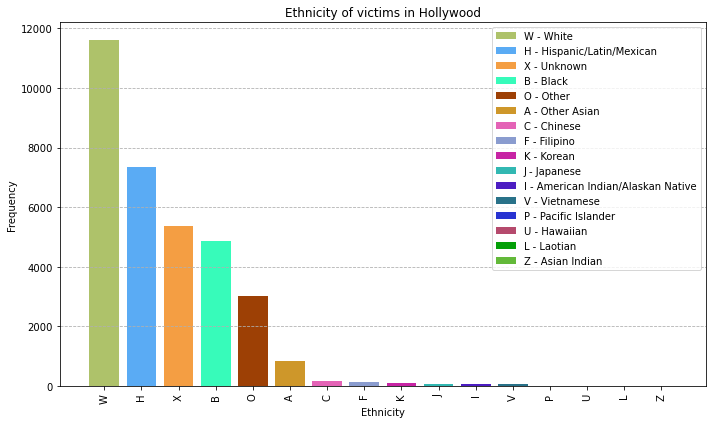

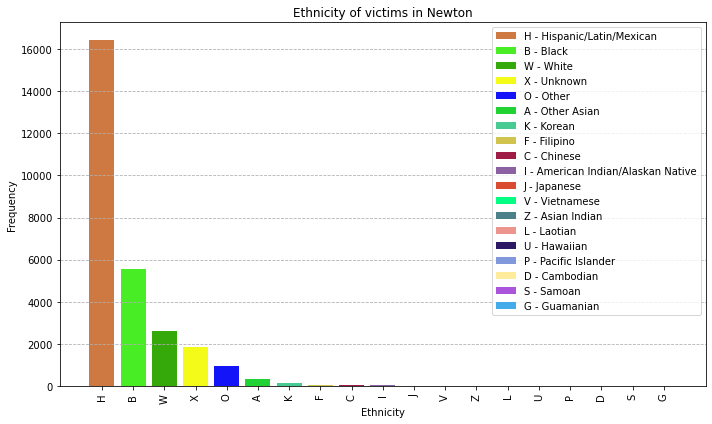

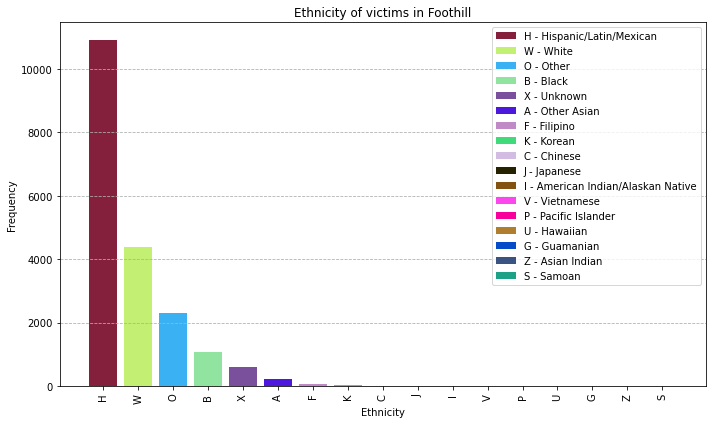

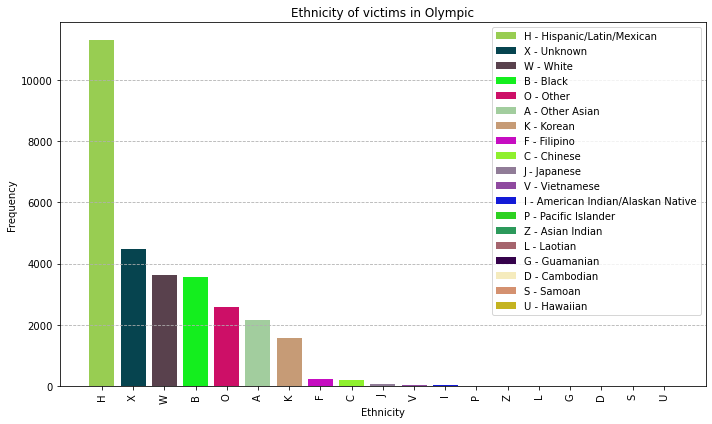

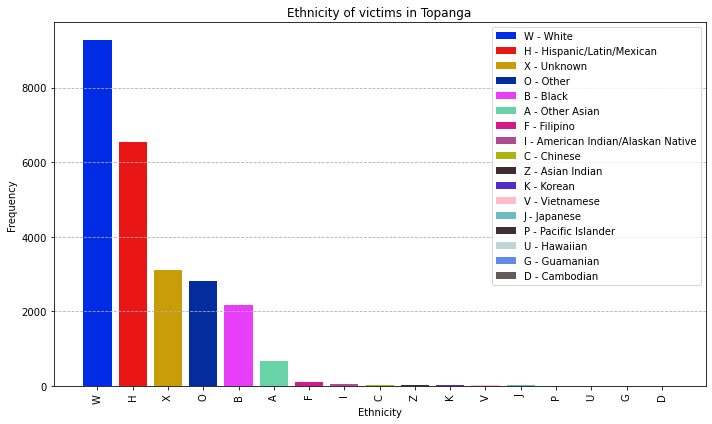

In [46]:
# Getting names of all locations in LA
area_names = df_orig['AREA NAME'].unique().tolist()

# Defining the ethnicity codes and labels
ethnicity_labels = {
    'A': 'Other Asian',
    'B': 'Black',
    'C': 'Chinese',
    'D': 'Cambodian',
    'F': 'Filipino',
    'G': 'Guamanian',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'American Indian/Alaskan Native',
    'J': 'Japanese',
    'K': 'Korean',
    'L': 'Laotian',
    'O': 'Other',
    'P': 'Pacific Islander',
    'S': 'Samoan',
    'U': 'Hawaiian',
    'V': 'Vietnamese',
    'W': 'White',
    'X': 'Unknown',
    'Z': 'Asian Indian'
}

for area in area_names:
    # Filtering the dataset based on the desired area name
    filtered_df = df_orig[df_orig['AREA NAME'] == area]

    # Counting the occurrences of each ethnicity in the filtered dataset
    eth_counts = filtered_df['Vict Descent'].value_counts()
    
    colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(eth_counts))]

    # Plotting a bar graph of ethnicities of victims in the specified area with consistent colors
    plt.figure(figsize=(10, 6))
    plt.bar(eth_counts.index, eth_counts.values, color=colors)
    plt.title(f'Ethnicity of victims in {area}')
    plt.xlabel('Ethnicity')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  
    plt.grid(axis='y', linestyle='--') 
    plt.tight_layout()
    legend_handles = [plt.bar(0, 0, color=color, label=f'{code} - {ethnicity_labels.get(code)}')
                      for code, color in zip(eth_counts.index, colors)]
    plt.legend(handles=legend_handles, loc='upper right')

    plt.show()

Displaying victim's gender at various locations of Los Angeles

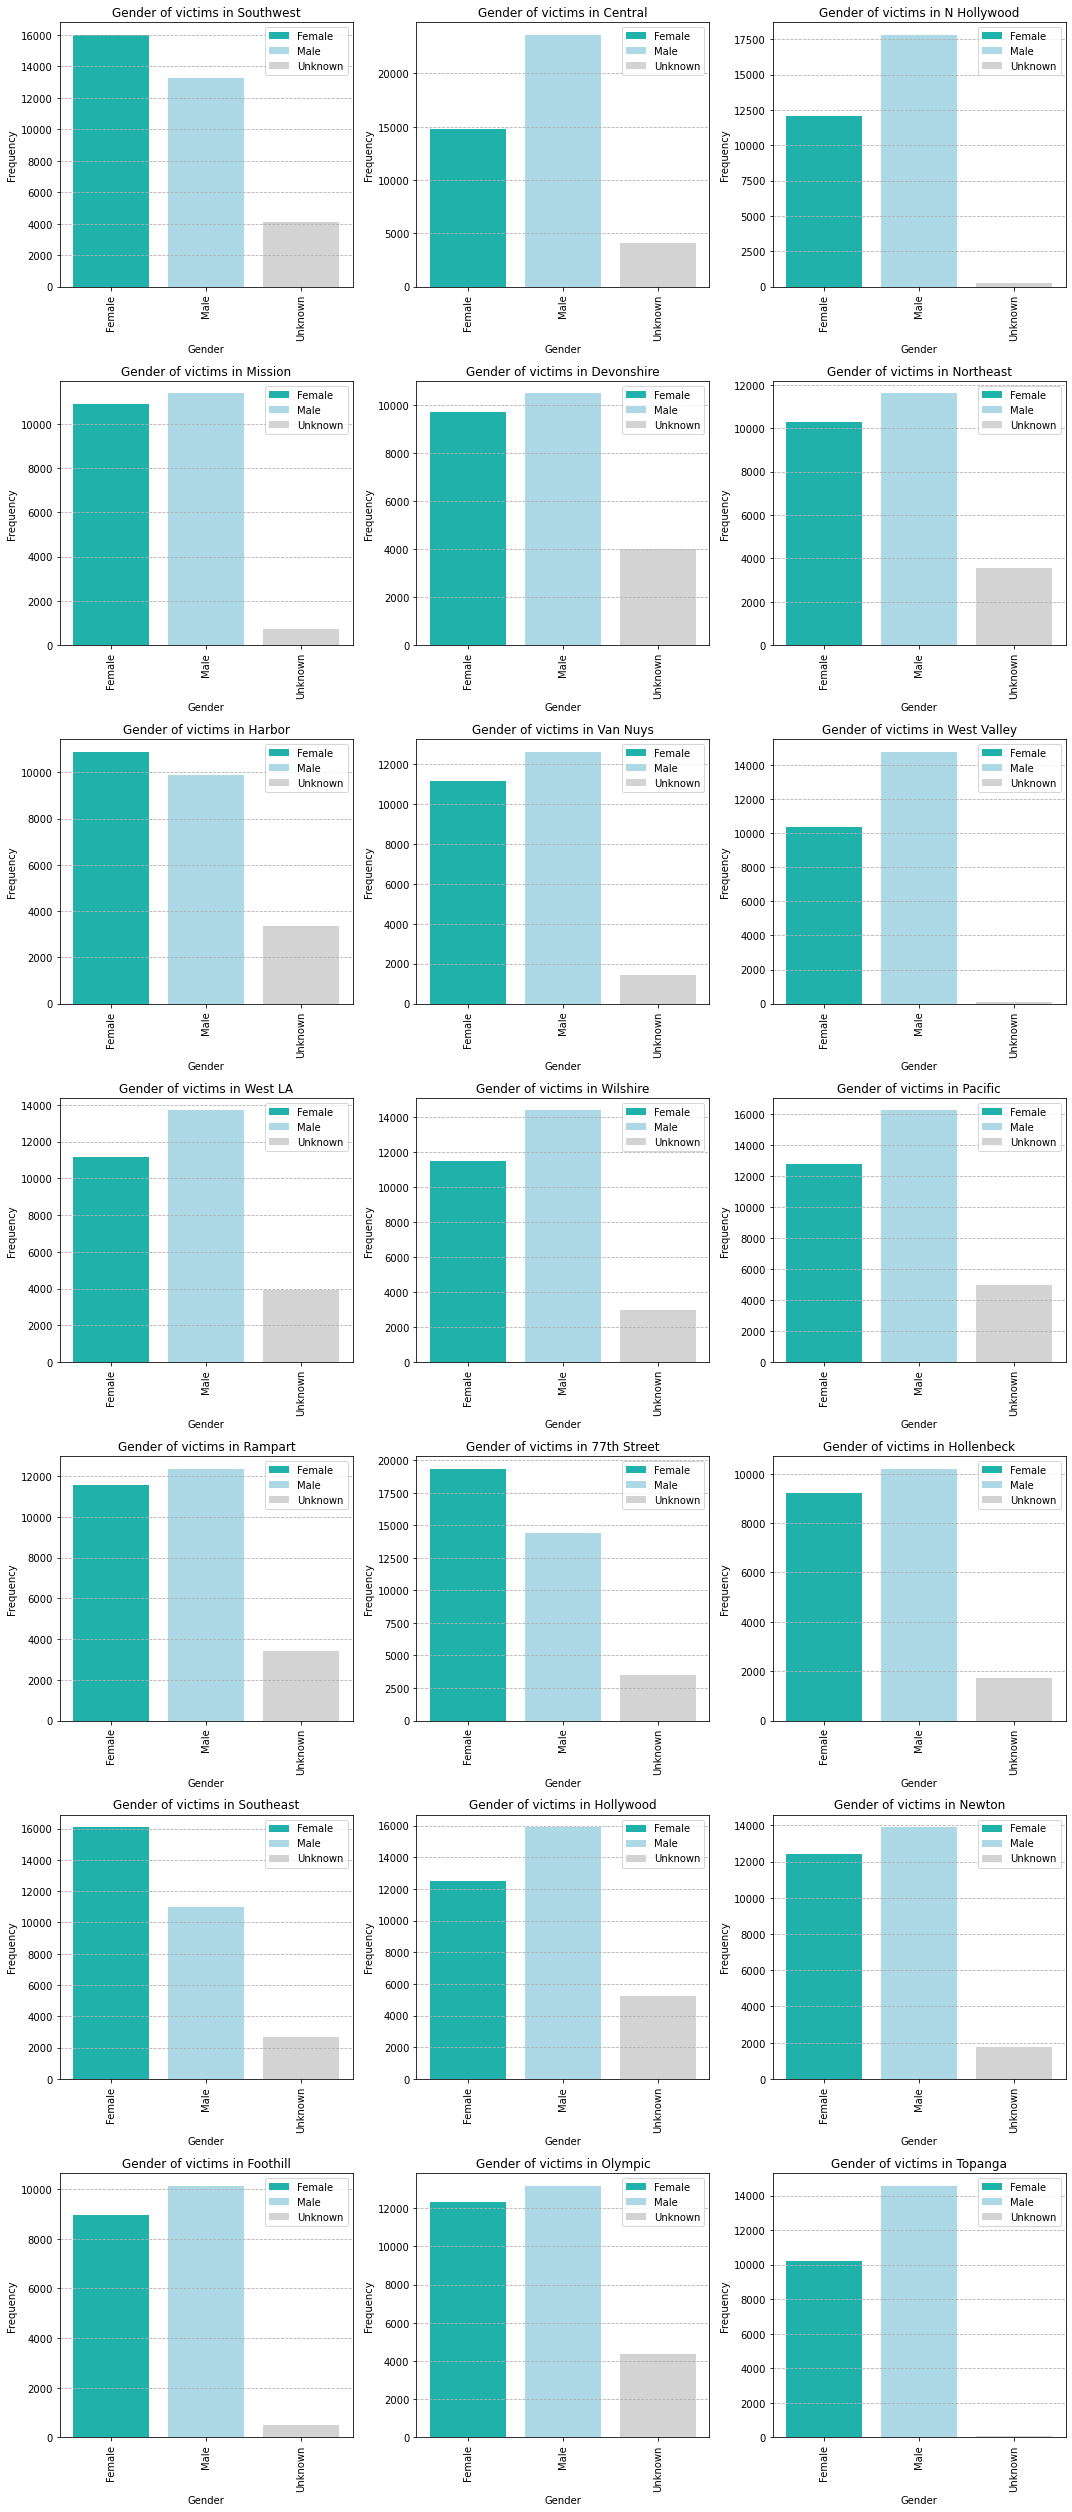

In [47]:
# Getting names of all locations in LA
area_names = df_orig['AREA NAME'].unique().tolist()

legend_colors = {'F': 'lightseagreen', 'M': 'lightblue', 'X': 'lightgrey'}
legend_labels = {'F': 'Female', 'M': 'Male', 'X': 'Unknown'}

num_areas = len(area_names)
num_columns = min(3, num_areas)  # Display a maximum of 3 columns

num_rows = (num_areas + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5 * num_rows))
axes = axes.flatten()

for i, area in enumerate(area_names):
    # Filtering the dataset based on the desired area name
    filtered_df = df_orig[df_orig['AREA NAME'] == area]

    # Counting the occurrences of each gender in the filtered dataset
    gender_counts = filtered_df['Vict Sex'].value_counts()

    # Selecting only the desired values and their corresponding colors
    selected_values = ['F', 'M', 'X']
    selected_colors = [legend_colors.get(value) for value in selected_values]

    # Plotting a bar graph of the selected values of 'Vict Sex'
    axes[i].bar(selected_values, gender_counts[selected_values], color=selected_colors)
    axes[i].set_title(f'Gender of victims in {area}')
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks(selected_values)
    axes[i].set_xticklabels([legend_labels.get(value) for value in selected_values], rotation=90)
    axes[i].grid(axis='y', linestyle='--')
    legend_handles = [plt.bar(0, 0, color=color, label=f'{label}')
                      for value, color, label in zip(selected_values, selected_colors, legend_labels.values())]
    axes[i].legend(handles=legend_handles, loc='upper right')

plt.tight_layout()

plt.show()

Number of crimes by age groups at various regions of Los Angeles

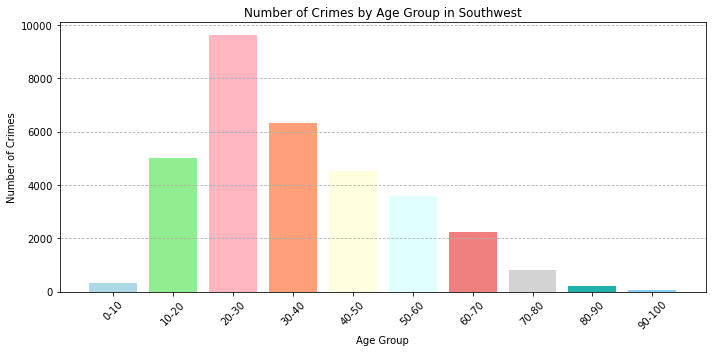

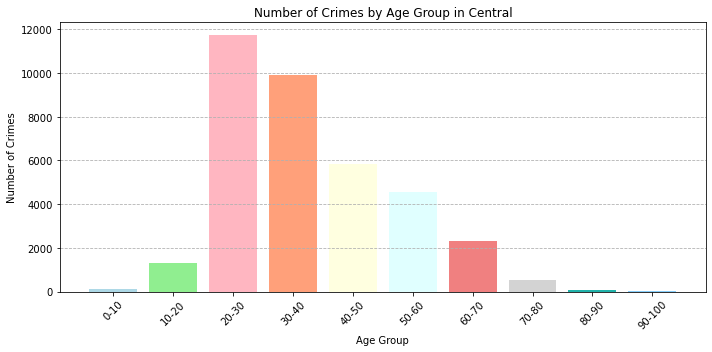

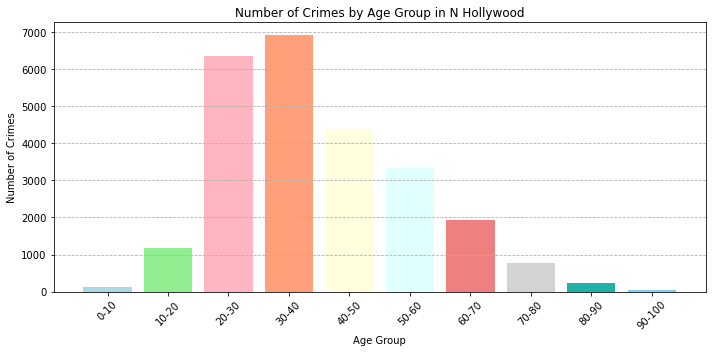

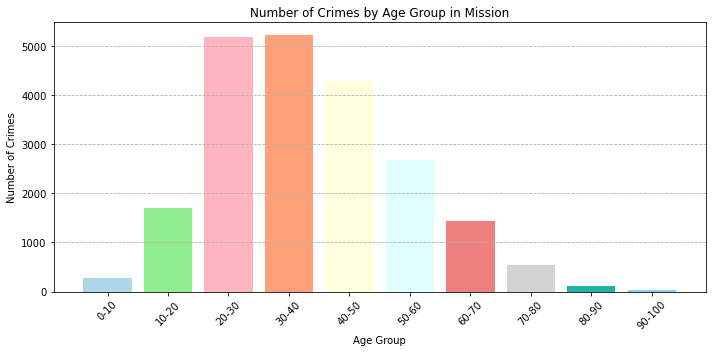

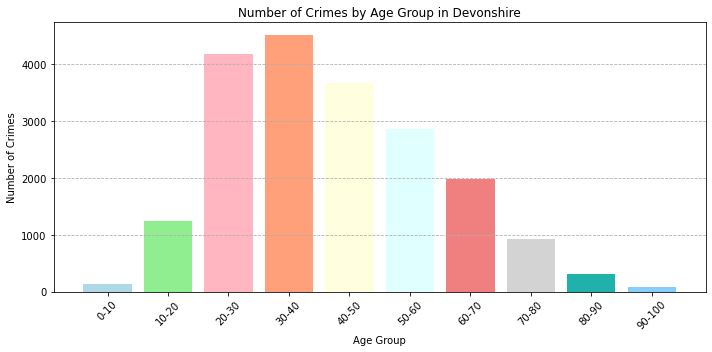

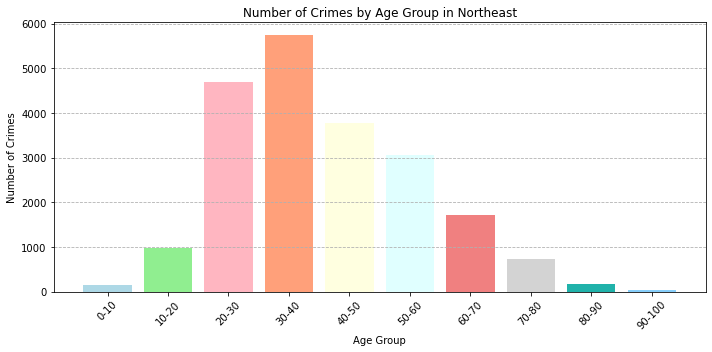

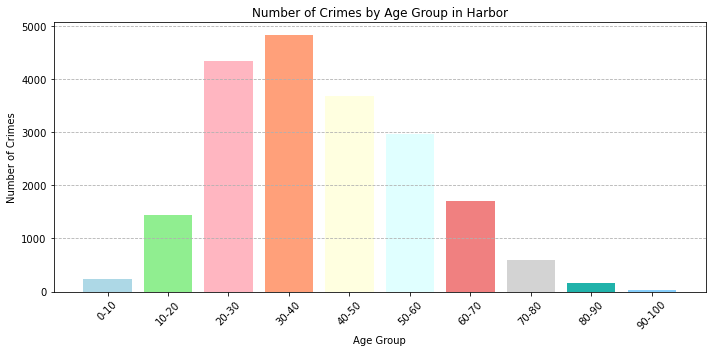

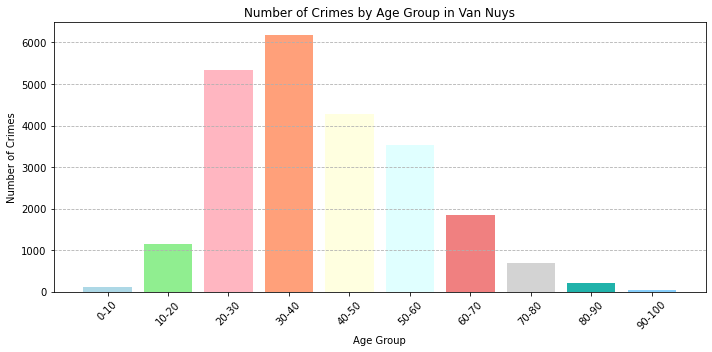

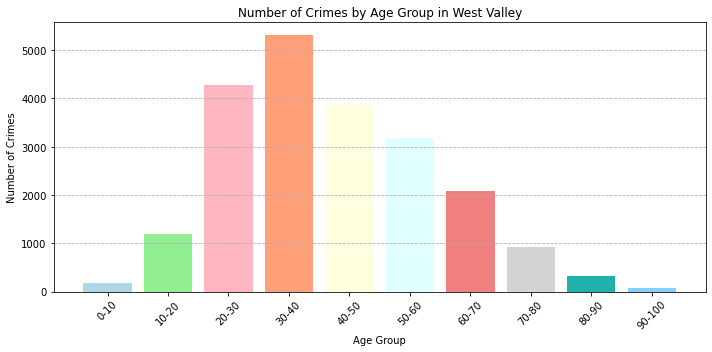

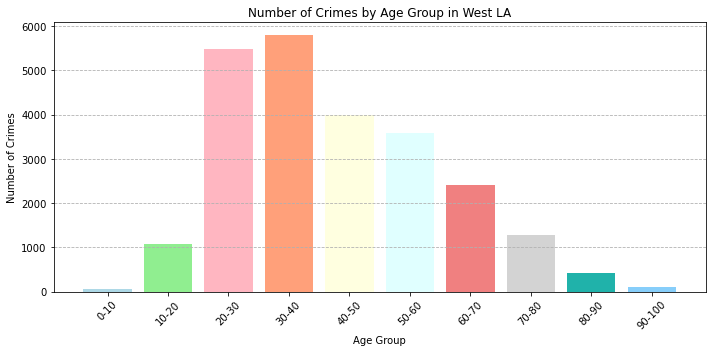

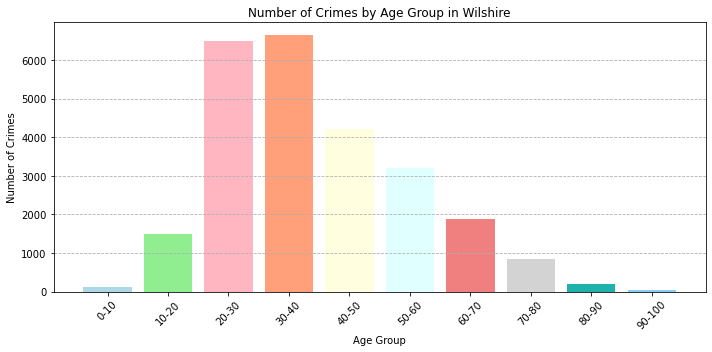

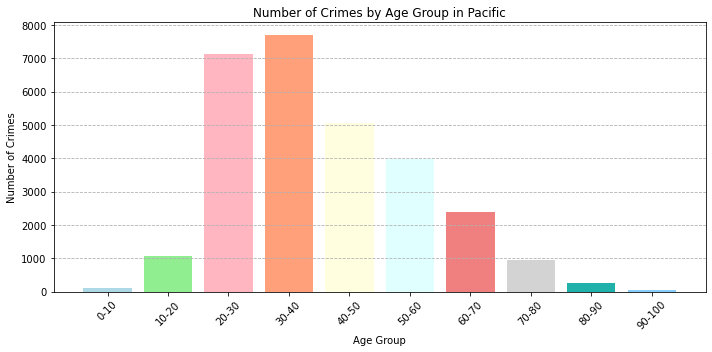

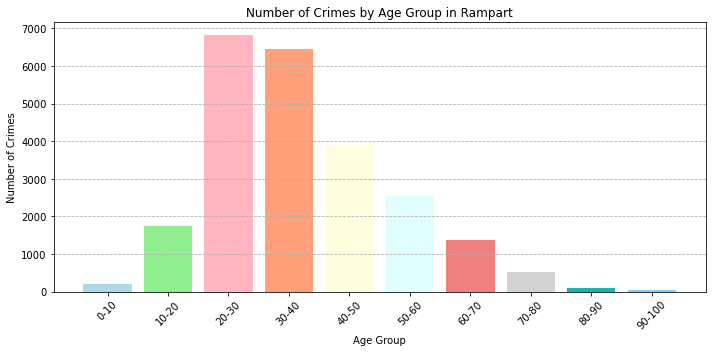

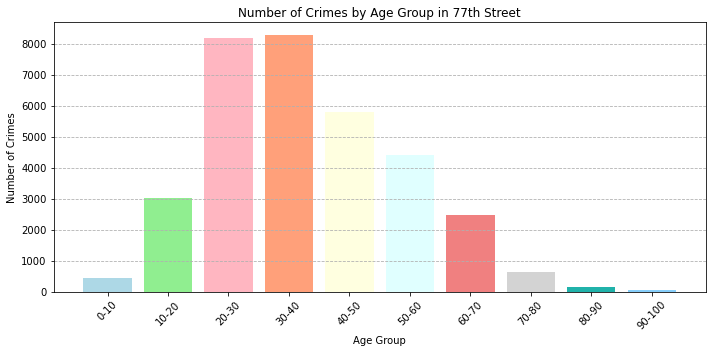

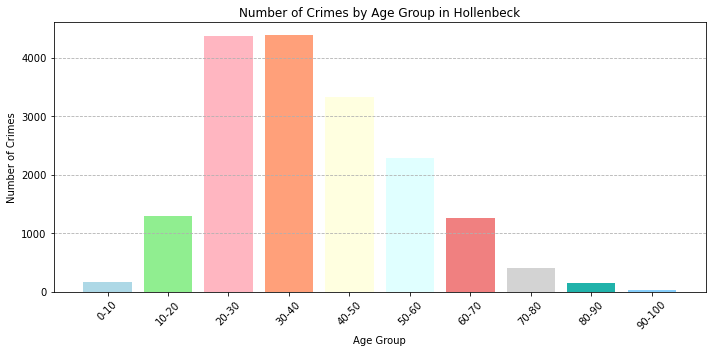

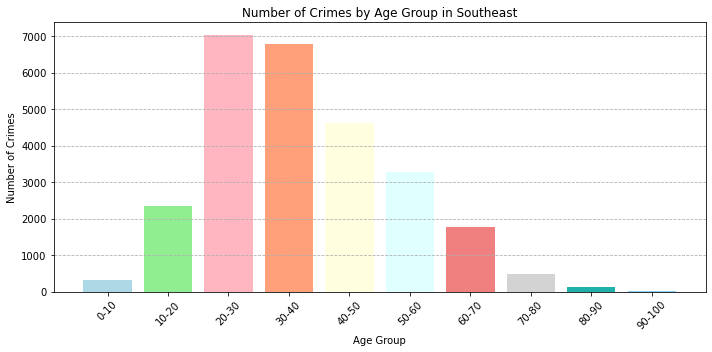

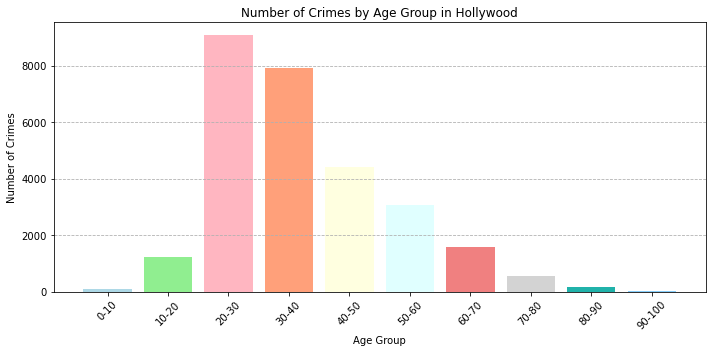

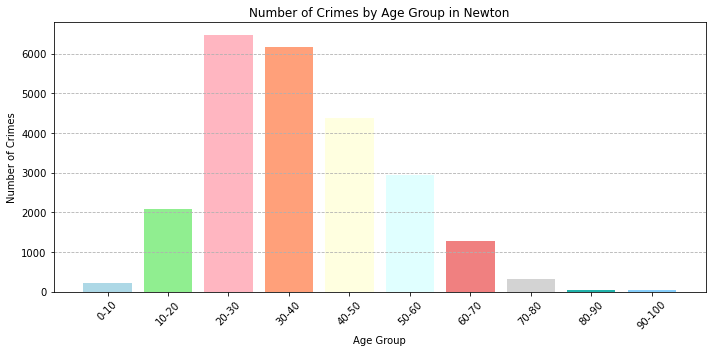

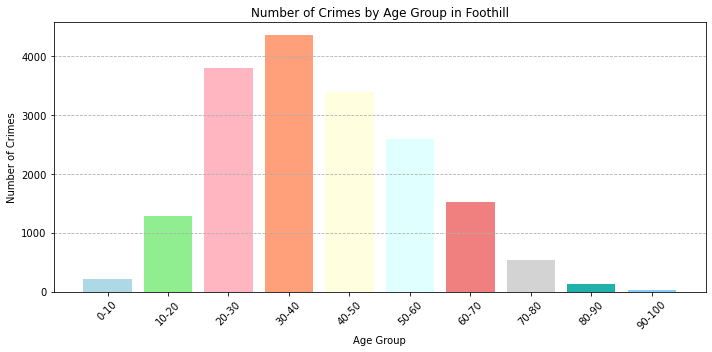

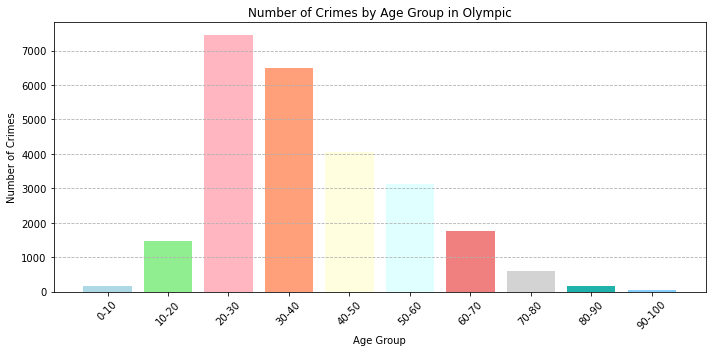

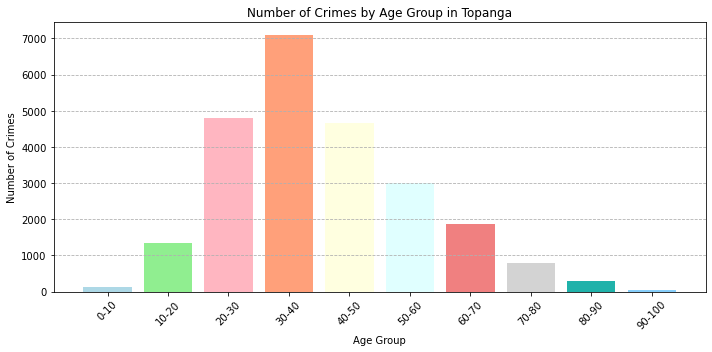

In [48]:
# Getting names of all locations in LA
area_names = df_orig['AREA NAME'].unique().tolist()

# Define the colors for the bars
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightsalmon', 'lightyellow',
          'lightcyan', 'lightcoral', 'lightgray', 'lightseagreen', 'lightskyblue']

for area in area_names:
    # Filter the dataset for the specified location
    area_df = df_orig[df_orig['AREA NAME'] == area]

    # Define the age groups and intervals
    age_groups = range(0, 101, 10)
    age_intervals = [f'{start}-{end}' for start, end in zip(age_groups[:-1], age_groups[1:])]

    # Count the number of crimes for each age group
    crime_counts = area_df['Vict Age'].groupby(pd.cut(area_df['Vict Age'], bins=age_groups)).count()

    # Plotting a bar graph for the age groups and crime counts with different colors
    plt.figure(figsize=(10, 5))
    plt.bar(age_intervals, crime_counts, color=colors)
    plt.title(f'Number of Crimes by Age Group in {area}')
    plt.xlabel('Age Group')
    plt.ylabel('Number of Crimes')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--')
    plt.tight_layout()

    plt.show()

Pie Chart for crime type distribution

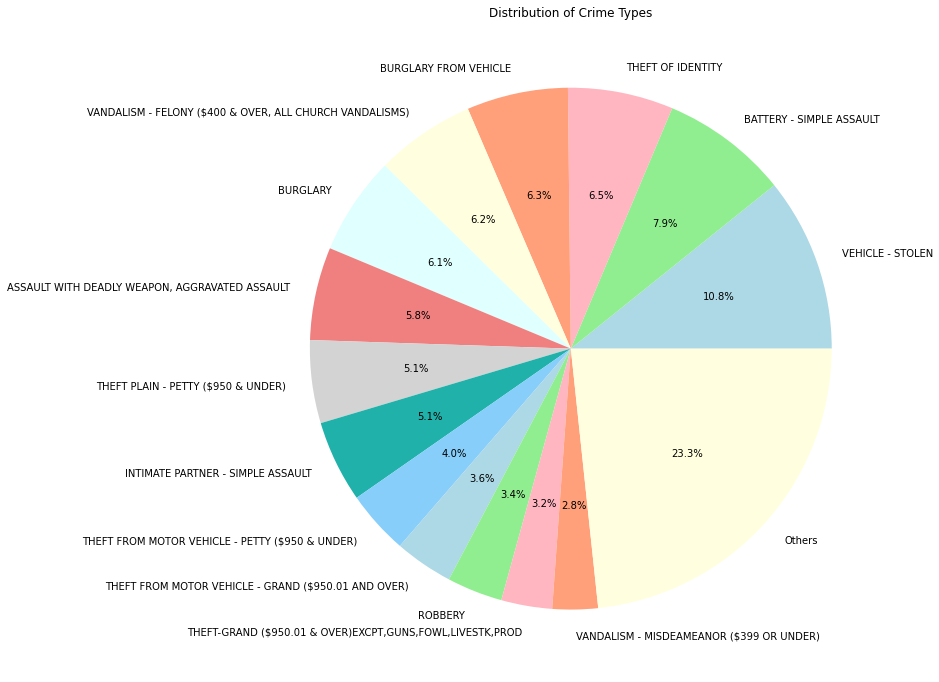

In [49]:
# Counting the occurrences of each crime type
crime_type_counts = df_orig['Crm Cd Desc'].value_counts()

# The total number of crimes
total_crimes = crime_type_counts.sum()

# The threshold for including crime types in the "others" category
threshold = total_crimes * 0.025 # crime less than 2.5% in "others" category
filtered_counts = crime_type_counts[crime_type_counts >= threshold]
other_count = total_crimes - filtered_counts.sum()
filtered_counts['Others'] = other_count

plt.figure(figsize=(12, 12))
colors = ['lightblue', 'lightgreen', 'lightpink', 'lightsalmon', 'lightyellow',
          'lightcyan', 'lightcoral', 'lightgray', 'lightseagreen', 'lightskyblue']
plt.pie(filtered_counts, labels=filtered_counts.index, colors=colors, autopct='%1.1f%%')

plt.title('Distribution of Crime Types')

plt.show()

Plotting crime trends over years and months

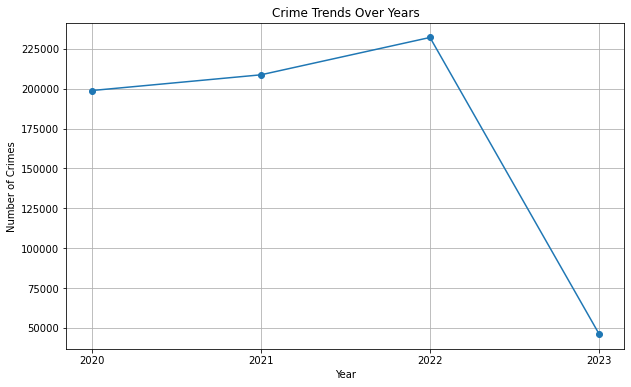

In [50]:
# Grouping the data by year and counting the number of crimes in each year
crime_counts_by_year = df.groupby('Year OCC').size()

# Creating a line chart
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_year.index, crime_counts_by_year.values, marker='o', linestyle='-')
plt.title('Crime Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks([2020, 2021, 2022, 2023])

plt.show()

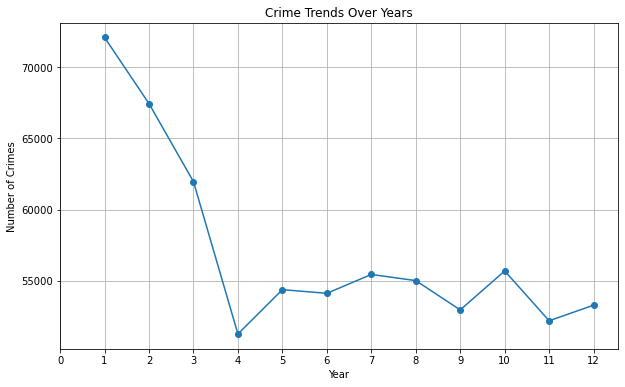

In [51]:
# Grouping the data by month and counting the number of crimes in each month
crime_counts_by_year = df.groupby('Month OCC').size()

# Creating a line chart
plt.figure(figsize=(10, 6))
plt.plot(crime_counts_by_year.index, crime_counts_by_year.values, marker='o', linestyle='-')
plt.title('Crime Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.xticks(range(0,13))

plt.show()